# Configuration

In [34]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns
import spotipy
import spotipy.oauth2     as oauth2

from pprint import pprint
import csv
import os


from matplotlib           import pyplot as plt 
from IPython.core.display import display, HTML

In [21]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

In [50]:
# ---------------------------------------------
# Spotify Settings 
# ---------------------------------------------

# Getting env variables
# CLI_ID = %env CLI_ID
# CLI_KEY = %env CLI_KEY

# credentials = oauth2.SpotifyClientCredentials(
#     client_id = CLI_ID, 
#     client_secret = CLI_KEY)
# token = credentials.get_access_token()
# spotify = spotipy.Spotify(auth=token)

# Getting Spotify Data

In [4]:
df_raw = pd.read_csv('./csv/dizem_que_o_amor_atrai.csv')
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1EzrEOXmMH3G43AXT1y7pA,https://open.spotify.com/track/1EzrEOXmMH3G43A...,I'm Yours,Jason Mraz,We Sing. We Dance. We Steal Things.,False,81,242186,11,1,4,0.69,0.46,0.05,0.59,0.00,0.10,0.72,150.95
1,1TX4h6MrIZ0K3r4OOG11WO,https://open.spotify.com/track/1TX4h6MrIZ0K3r4...,Flor de Lis,Djavan,A Voz e o Violão,False,61,225266,2,0,4,0.55,0.50,0.05,0.22,0.00,0.06,0.78,85.79
2,2ukW9zOr51AYeLSmCtTVqW,https://open.spotify.com/track/2ukW9zOr51AYeLS...,Não Me Deixe Só,Vanessa Da Mata,Vanessa da Mata,False,54,189666,2,1,4,0.73,0.47,0.04,0.33,0.01,0.10,0.64,107.09
3,55h7vJchibLdUkxdlX3fK7,https://open.spotify.com/track/55h7vJchibLdUkx...,Treasure,Bruno Mars,Unorthodox Jukebox,True,75,178560,5,0,4,0.87,0.69,0.04,0.04,0.00,0.32,0.94,116.02
4,5nxNqPGJJD1hwh2v2WZhje,https://open.spotify.com/track/5nxNqPGJJD1hwh2...,Walk Away,Franz Ferdinand,You Could Have It So Much Better,False,51,216333,2,1,4,0.58,0.83,0.03,0.12,0.00,0.37,0.51,124.12


## Quick explanation:

* **Instrumentalness**: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* **Acousticness**: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* **Liveness**: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* **Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* **Energy**: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* **Danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* **Valence**: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

## Histograms

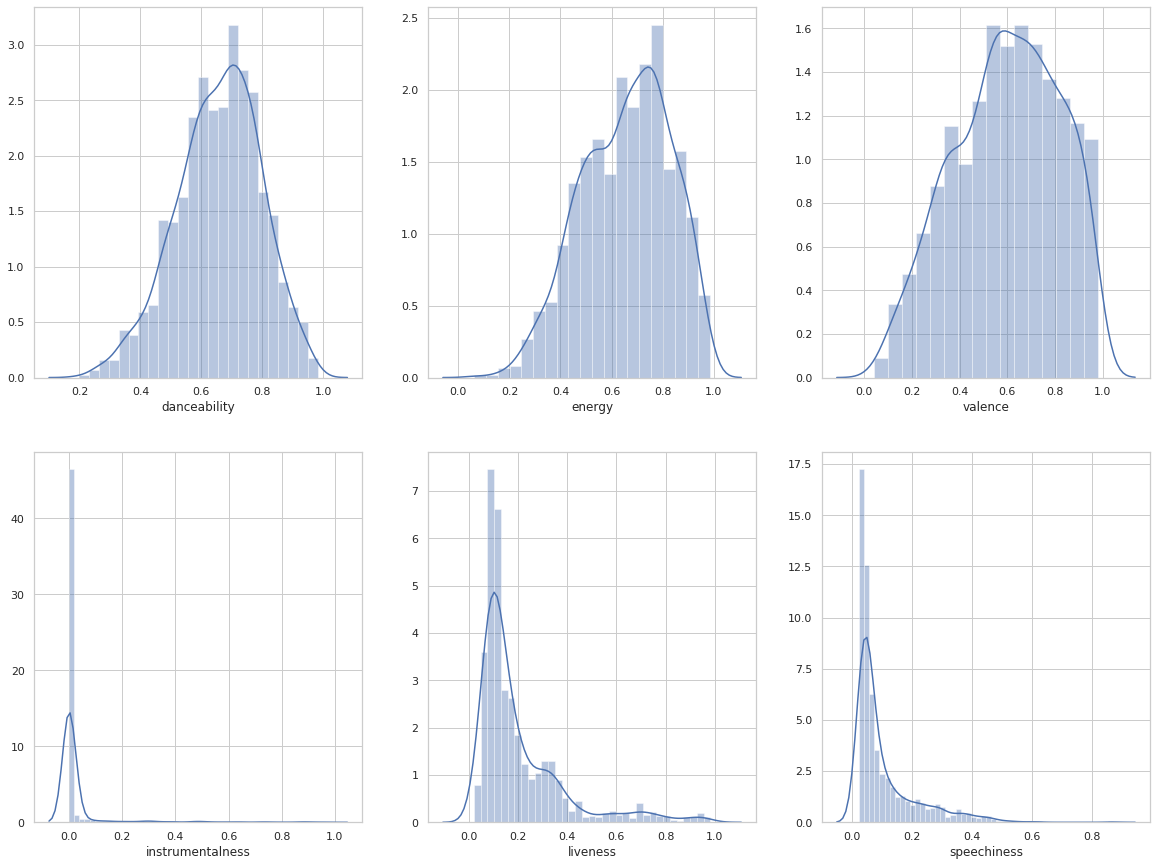

In [64]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.distplot(df_raw['danceability'], ax=axs[0,0])
sns.distplot(df_raw['energy'], ax=axs[0,1])
sns.distplot(df_raw['valence'], ax=axs[0,2])
sns.distplot(df_raw['instrumentalness'], ax=axs[1,0])
sns.distplot(df_raw['liveness'], ax=axs[1,1])
sns.distplot(df_raw['speechiness'], ax=axs[1,2])
plt.show()

## Boxplots

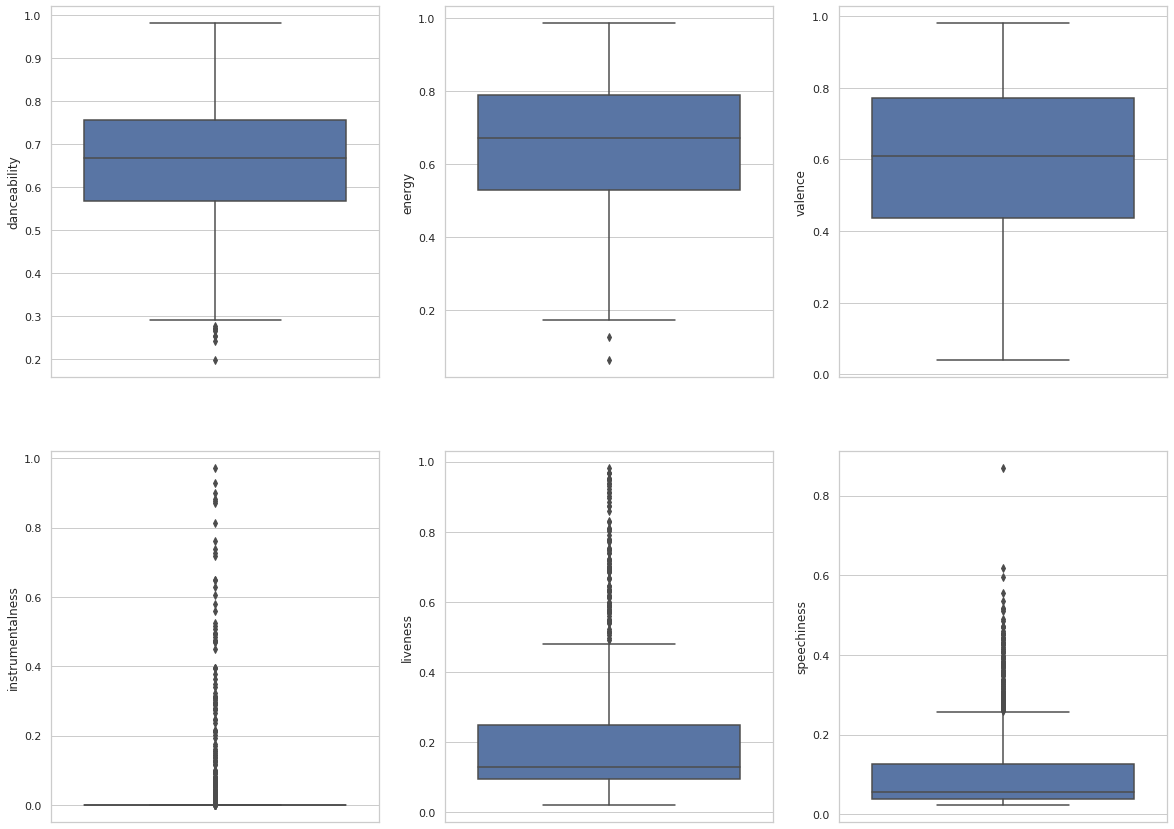

In [61]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.boxplot(df_raw['danceability'], orient="v", ax=axs[0,0])
sns.boxplot(df_raw['energy'], orient="v", ax=axs[0,1])
sns.boxplot(df_raw['valence'], orient="v", ax=axs[0,2])
sns.boxplot(df_raw['instrumentalness'], orient="v", ax=axs[1,0])
sns.boxplot(df_raw['liveness'], orient="v", ax=axs[1,1])
sns.boxplot(df_raw['speechiness'], orient="v", ax=axs[1,2])
plt.show()

In [54]:
df_raw.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00
mean,41.62,224520.05,5.48,0.51,3.96,0.66,0.66,0.10,0.25,0.02,0.20,0.60,118.55
std,24.39,49038.20,3.63,0.50,0.26,0.14,0.17,0.11,0.25,0.11,0.18,0.22,27.40
min,0.00,97000.00,0.00,0.00,1.00,0.20,0.06,0.02,0.00,0.00,0.02,0.04,54.75
25%,22.00,192095.50,2.00,0.00,4.00,0.57,0.53,0.04,0.04,0.00,0.09,0.44,96.01
50%,47.00,217797.50,6.00,1.00,4.00,0.67,0.67,0.06,0.16,0.00,0.13,0.61,117.97
75%,61.00,251139.75,9.00,1.00,4.00,0.76,0.79,0.13,0.41,0.00,0.25,0.77,134.01
max,94.00,505482.00,11.00,1.00,5.00,0.98,0.99,0.87,0.97,0.97,0.98,0.98,212.14


## Possibly offset music

In [59]:
df = df_raw.loc[(df_raw['energy'] < 0.53) & (df_raw['danceability'] < 0.57) & (df_raw['valence'] < 0.44)]
df

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
49,1CRFWfZEfLCs7pYDlXFYMJ,https://open.spotify.com/track/1CRFWfZEfLCs7pY...,Holdin On,Flume,Flume,False,41,154414,8,1,4,0.43,0.44,0.12,0.17,0.00,0.13,0.22,90.05
61,2cyTXelFvE7WjSAj8U5vvb,https://open.spotify.com/track/2cyTXelFvE7WjSA...,Time,Mikky Ekko,Time (Spotify Exclusive),False,43,254293,6,1,3,0.48,0.28,0.03,0.26,0.00,0.11,0.15,122.36
74,1AhDOtG9vPSOmsWgNW0BEY,https://open.spotify.com/track/1AhDOtG9vPSOmsW...,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),False,27,354320,0,0,4,0.41,0.40,0.05,0.27,0.00,0.30,0.22,71.11
79,5PK1JCSdr34gWgzYHgt3Jq,https://open.spotify.com/track/5PK1JCSdr34gWgz...,Feeling Good,Muse,Origin of Symmetry,False,63,198800,7,0,3,0.34,0.42,0.03,0.30,0.00,0.10,0.27,109.04
105,0YBq701BXkMaK6V5UyvOpT,https://open.spotify.com/track/0YBq701BXkMaK6V...,Oração,A Banda Mais Bonita da Cidade,A Banda Mais Bonita da Cidade,False,60,301346,7,1,4,0.42,0.47,0.03,0.61,0.00,0.23,0.38,128.63
113,3FGUAszpLN0pPh2jQL4vOv,https://open.spotify.com/track/3FGUAszpLN0pPh2...,Y,High Street Fluke,Y,False,0,182225,4,1,4,0.55,0.50,0.04,0.01,0.00,0.10,0.29,111.98
118,3zBvfeQ4RnDfAHQmvLflbk,https://open.spotify.com/track/3zBvfeQ4RnDfAHQ...,Do it For Her,Jayn,Do it For Her / Him,False,32,176577,0,1,4,0.51,0.41,0.04,0.35,0.00,0.11,0.27,100.01
143,3DwN8YfAtvJh4c5u8DZPen,https://open.spotify.com/track/3DwN8YfAtvJh4c5...,"Better Than Yourself (Criminal Mind, Pt. 2)",Lukas Graham,Lukas Graham,False,49,266226,6,0,4,0.56,0.51,0.04,0.31,0.00,0.09,0.21,99.34
262,1AqJft5Jpmc2ob71KRL562,https://open.spotify.com/track/1AqJft5Jpmc2ob7...,Pra Você Dar o Nome,5 a Seco,Ao Vivo No Auditório Ibirapuera,False,59,242026,11,1,4,0.47,0.26,0.03,0.91,0.00,0.89,0.17,104.13
271,1cc0kyZrheNxOYPn3VoVEH,https://open.spotify.com/track/1cc0kyZrheNxOYP...,Na Sua Estante,Pitty,Anacrônico,False,61,222040,11,0,4,0.56,0.50,0.03,0.02,0.00,0.30,0.36,106.05
